In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import word_tokenize,sent_tokenize
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import re
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
query="(#layoffs, #elonmusk) until:2022-11-24 since:2010-01-01"
tweets = []
limit = 1000
for tweet in sntwitter.TwitterHashtagScraper(query).get_items():
        
    #print(vars(tweet))
    #break
    
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.url, tweet.user.username, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount, tweet.replyCount])
        
df = pd.DataFrame(tweets, columns=['Date', 'URL', 'Username', 'Location', 'Tweet', 'LikeCount', 'Retweet Count', 'Reply Count'])
print(df)
 
df.to_csv('tweetsfin.csv')

                         Date  \
0   2022-11-23 13:56:00+00:00   
1   2022-11-23 12:13:54+00:00   
2   2022-11-23 12:04:37+00:00   
3   2022-11-23 06:48:22+00:00   
4   2022-11-23 06:15:41+00:00   
..                        ...   
703 2017-11-02 18:02:26+00:00   
704 2017-11-02 18:02:26+00:00   
705 2017-11-02 17:56:10+00:00   
706 2017-11-02 17:56:08+00:00   
707 2017-11-02 17:56:08+00:00   

                                                   URL         Username  \
0    https://twitter.com/MoneycontrolH/status/15954...    MoneycontrolH   
1    https://twitter.com/jasmin_kumar_/status/15953...    jasmin_kumar_   
2    https://twitter.com/Sumit44658569/status/15953...    Sumit44658569   
3    https://twitter.com/naye_news/status/159530825...        naye_news   
4    https://twitter.com/techportalntw/status/15953...    techportalntw   
..                                                 ...              ...   
703  https://twitter.com/Autotestdrivers/status/926...  Autotestdrivers   
704

In [3]:
df1 = pd.read_csv('tweetsfin.csv')
df1

,Unnamed: 0,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,#Layoffs || Meta-Twitter Layoffs: सिर्फ लोअर ल...,0,0,0
1,1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,NaN,Since when has government started to pull up p...,3,2,0
2,2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai","Maybe @elonmusk should buy LinkedIn, it's beco...",2,1,1
3,3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,NaN,Nearly 75% Twitter Employees Layoffs In A Mont...,0,0,0
4,4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,In an all-hands meeting with @Twitter employee...,2,0,0
...,...,...,...,...,...,...,...,...,...
703,703,2017-11-02 18:02:26+00:00,https://twitter.com/Autotestdrivers/status/926...,Autotestdrivers,Mesa AZ,'Shame!': Elon Musk scolds reporters who cover...,0,0,0
704,704,2017-11-02 18:02:26+00:00,https://twitter.com/TalkingScars/status/926147...,TalkingScars,NaN,'Shame!': Elon Musk scolds reporters who cover...,0,0,0
705,705,2017-11-02 17:56:10+00:00,https://twitter.com/dealertucsonaz/status/9261...,dealertucsonaz,"Tuscon, AZ",#dealertucsonAZ #elonmusk #layoffs #official '...,0,0,0
706,706,2017-11-02 17:56:08+00:00,https://twitter.com/mobileglasstx/status/92614...,mobileglasstx,"Dallas, TX",#elonmusk #layoffs 'Shame!': Elon Musk scolds ...,0,0,0


In [4]:
copy1 = df.copy(deep=True)

### Pre-Processing

In [5]:
#Lowecase
copy1['Tweet'] = copy1['Tweet'].apply(lambda x: str(x).lower())
copy1.head()

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,#layoffs || meta-twitter layoffs: सिर्फ लोअर ल...,0,0,0
1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,,since when has government started to pull up p...,3,2,0
2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai","maybe @elonmusk should buy linkedin, it's beco...",2,1,1
3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,,nearly 75% twitter employees layoffs in a mont...,0,0,0
4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,in an all-hands meeting with @twitter employee...,2,0,0


In [6]:
#Remove punctuations
copy1['Tweet']=copy1['Tweet'].apply(lambda x: x.translate({ord(c):'' for c in "[à¤¯à¤¾à¤².!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]"}))
copy1.head()

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,layoffs metatwitter layoffs सिर्फ लोअर लेवल क...,0,0,0
1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,,since when has government started to pull up p...,3,2,0
2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai",maybe elonmusk should buy linkedin it's becomi...,2,1,1
3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,,nearly 75 twitter employees layoffs in a month...,0,0,0
4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,in an allhands meeting with twitter employees ...,2,0,0


In [7]:
#Pre-Processing - Removing emoticons and chinese words and also stripping extra spaces,newline character.
copy1['Tweet']=copy1['Tweet'].apply(lambda x: x.strip())
import re
def remove_emoji(row):
    emoji = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U00002500-\U00002BEF"  # chinese char

                           "]+", flags=re.UNICODE)
    return emoji.sub(r'', row)
copy1['Tweet']=copy1['Tweet'].apply(remove_emoji)
copy1

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,layoffs metatwitter layoffs सिर्फ लोअर लेवल क...,0,0,0
1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,,since when has government started to pull up p...,3,2,0
2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai",maybe elonmusk should buy linkedin it's becomi...,2,1,1
3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,,nearly 75 twitter employees layoffs in a month...,0,0,0
4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,in an allhands meeting with twitter employees ...,2,0,0
...,...,...,...,...,...,...,...,...
703,2017-11-02 18:02:26+00:00,https://twitter.com/Autotestdrivers/status/926...,Autotestdrivers,Mesa AZ,'shame' elon musk scolds reporters who covered...,0,0,0
704,2017-11-02 18:02:26+00:00,https://twitter.com/TalkingScars/status/926147...,TalkingScars,,'shame' elon musk scolds reporters who covered...,0,0,0
705,2017-11-02 17:56:10+00:00,https://twitter.com/dealertucsonaz/status/9261...,dealertucsonaz,"Tuscon, AZ",dealertucsonaz elonmusk layoffs official 'sham...,0,0,0
706,2017-11-02 17:56:08+00:00,https://twitter.com/mobileglasstx/status/92614...,mobileglasstx,"Dallas, TX",elonmusk layoffs 'shame' elon musk scolds repo...,0,0,0


In [8]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(row):
    row = row.split()
    row_new = " ".join([i for i in row if i not in stop_words])
    return row_new
def remove_freq_words(row):
    freq  = ['thanks','thnkx','thx','hey','hello','please','hi','hola','sorry','i','you','u','apologies']
    row = row.split()
    row_new = " ".join([i for i in row if i not in freq])
    return row_new

In [9]:
copy1['Tweet'].apply(remove_stopwords)

0      layoffs metatwitter layoffs सिर्फ लोअर लेवल के...
1      since government started pull private companie...
2      maybe elonmusk buy linkedin becoming new socia...
3      nearly 75 twitter employees layoffs month elon...
4      allhands meeting twitter employees elonmusk in...
                             ...                        
703    'shame' elon musk scolds reporters covered tes...
704    'shame' elon musk scolds reporters covered tes...
705    dealertucsonaz elonmusk layoffs official 'sham...
706    elonmusk layoffs 'shame' elon musk scolds repo...
707    elonmusk layoffs 'shame' elon musk scolds repo...
Name: Tweet, Length: 708, dtype: object

In [10]:
#Remove URL's
import re
def remove_urls(row):
    url_pattern = re.compile(r'http?://\S+|ww\.\S+|^\d+\s|\s\d+\s|\s\d+$')
    return url_pattern.sub(r'', row)

In [11]:
copy1['Tweet'].apply(remove_urls)
copy1

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,layoffs metatwitter layoffs सिर्फ लोअर लेवल क...,0,0,0
1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,,since when has government started to pull up p...,3,2,0
2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai",maybe elonmusk should buy linkedin it's becomi...,2,1,1
3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,,nearly 75 twitter employees layoffs in a month...,0,0,0
4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,in an allhands meeting with twitter employees ...,2,0,0
...,...,...,...,...,...,...,...,...
703,2017-11-02 18:02:26+00:00,https://twitter.com/Autotestdrivers/status/926...,Autotestdrivers,Mesa AZ,'shame' elon musk scolds reporters who covered...,0,0,0
704,2017-11-02 18:02:26+00:00,https://twitter.com/TalkingScars/status/926147...,TalkingScars,,'shame' elon musk scolds reporters who covered...,0,0,0
705,2017-11-02 17:56:10+00:00,https://twitter.com/dealertucsonaz/status/9261...,dealertucsonaz,"Tuscon, AZ",dealertucsonaz elonmusk layoffs official 'sham...,0,0,0
706,2017-11-02 17:56:08+00:00,https://twitter.com/mobileglasstx/status/92614...,mobileglasstx,"Dallas, TX",elonmusk layoffs 'shame' elon musk scolds repo...,0,0,0


In [12]:
#Removing Non-English Words
import enchant
def check_english(row):
    d = enchant.Dict("en_US")
    new= []
    new = [x for x in row if d.check(x)==True]
    return new

In [13]:
copy1['Tweet'].apply(check_english)

0      [l, a, y, o, f, f, s,  ,  , m, e, t, a, t, w, ...
1      [s, i, n, c, e,  , w, h, e, n,  , h, a, s,  , ...
2      [m, a, y, b, e,  , e, l, o, n, m, u, s, k,  , ...
3      [n, e, a, r, l, y,  , 7, 5,  , t, w, i, t, t, ...
4      [i, n,  , a, n,  , a, l, l, h, a, n, d, s,  , ...
                             ...                        
703    [s, h, a, m, e,  , e, l, o, n,  , m, u, s, k, ...
704    [s, h, a, m, e,  , e, l, o, n,  , m, u, s, k, ...
705    [d, e, a, l, e, r, t, u, c, s, o, n, a, z,  , ...
706    [e, l, o, n, m, u, s, k,  , l, a, y, o, f, f, ...
707    [e, l, o, n, m, u, s, k,  , l, a, y, o, f, f, ...
Name: Tweet, Length: 708, dtype: object

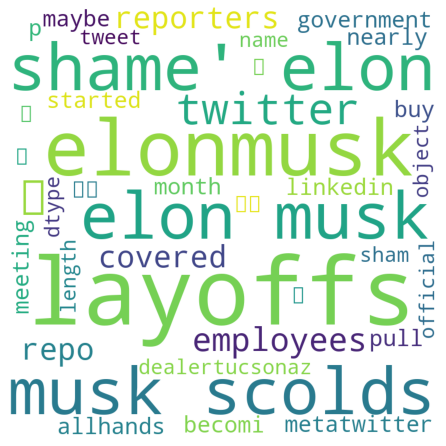

In [14]:
#Generating WordCloud
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file

# typecaste each val to string
val = str(copy1['Tweet'])

# split the value
tokens = val.split()

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
stopwords = stopwords,
min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Sentiment Analysis

In [15]:
sent_analysis = copy1
sentiment_analyzer = SentimentIntensityAnalyzer()
sent_analysis['compound'] = [sentiment_analyzer.polarity_scores(x)['compound'] for x in sent_analysis['Tweet']]
sent_analysis['pos'] = [sentiment_analyzer.polarity_scores(x)['pos'] for x in sent_analysis['Tweet']]
sent_analysis['neg'] = [sentiment_analyzer.polarity_scores(x)['neg'] for x in sent_analysis['Tweet']]
sent_analysis['neu'] = [sentiment_analyzer.polarity_scores(x)['neu'] for x in sent_analysis['Tweet']]
sent_analysis.sample(50)

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count,compound,pos,neg,neu
649,2022-06-06 10:00:19+00:00,https://twitter.com/jais_george/status/1533750...,jais_george,New Delhi,elon musk opens door to a tesla talent exodus ...,0,0,0,0.4215,0.167,0.000,0.833
685,2019-01-27 06:30:07+00:00,https://twitter.com/freeag8/status/10894102024...,freeag8,"Southern California, USA 🏖️😎",hundreds of layoffs hit spacex via pitchbook ...,1,5,0,-0.0516,0.092,0.099,0.810
249,2022-11-08 07:29:59+00:00,https://twitter.com/HRD_Asia/status/1589882912...,HRD_Asia,Singapore,former twitter ceo jack dorsey apologised over...,0,0,0,0.1027,0.055,0.000,0.945
358,2022-11-04 23:12:20+00:00,https://twitter.com/MrRomyRome/status/15886705...,MrRomyRome,My Little Place,today elonmusk's twitter cuts begin twitter el...,0,0,0,-0.2960,0.000,0.216,0.784
94,2022-11-18 07:59:32+00:00,https://twitter.com/firstpost/status/159351422...,firstpost,"Mumbai, India",fpnews\n42 twitter employees opt for freedom f...,3,0,0,0.6369,0.198,0.000,0.802
420,2022-11-04 11:33:32+00:00,https://twitter.com/MeToo_MenToo/status/158849...,MeToo_MenToo,"🇬🇧 London, England, UK 🇬🇧","""the federal worker adjustment amp retraining ...",2,0,0,-0.4019,0.000,0.101,0.899
648,2022-06-06 12:50:25+00:00,https://twitter.com/MokhbirE/status/1533793431...,MokhbirE,Egypt,7 tesla \n\nينوي إيلون ماسك تسريح 10 من العامل...,12,0,1,0.0000,0.000,0.000,1.000
14,2022-11-22 09:55:02+00:00,https://twitter.com/lordvader311_/status/15949...,lordvader311_,"Earth, Alpha Quadrant",report musk stops twitter's layoff spree to ad...,0,0,0,-0.5859,0.000,0.127,0.873
145,2022-11-14 07:43:32+00:00,https://twitter.com/WeJanNews/status/159206064...,WeJanNews,"Noida, India",according to platformer roughly 4400 contractu...,0,0,0,-0.3182,0.000,0.084,0.916
312,2022-11-05 20:55:15+00:00,https://twitter.com/Biswaji34262817/status/158...,Biswaji34262817,Amsterdam,twitter was already in trouble before elonthe ...,2,0,0,0.0196,0.143,0.102,0.755


### Topic Modelling

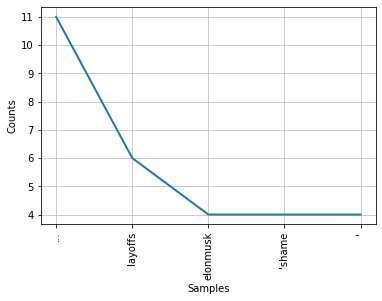

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
import re
from nltk.util import ngrams

def generate_n_grams(formatted_text,n):
    formatted_text = formatted_text.lower()
    n_grams=ngrams(nltk.word_tokenize(formatted_text),n)
    return [' '.join(grams) for grams in n_grams]

n_grams=generate_n_grams(val,1)
nfreq_dist = nltk.FreqDist(n_grams)
nfreq_dist.plot(5,cumulative=False)

In [17]:
from operator import itemgetter
#Sentence Scores
sentences = []
for sent in copy1['Tweet']:
    if sent != '':
        sentences.append(sent)
str1 = '. '.join(sentences)
str1
frequency = nfreq_dist
from nltk.tokenize import sent_tokenize
sentences=sent_tokenize(str1)
max_frequency = max(frequency.values())
for word in frequency.keys():
    frequency[word] = frequency[word]/max_frequency
frequency
sentence_scores={}
for sentence in sentences:
    for word in nltk.word_tokenize(sentence.lower()):
        if word in frequency.keys():
            if len(sentence.split(' ')) < 30:
                if sentence not in sentence_scores.keys():
                    sentence_scores[sentence] = frequency[word]
                else:
                    sentence_scores[sentence] += frequency[word]
sorted_sentence = dict(sorted(sentence_scores.items(), key = itemgetter(1), reverse = True)[:20])
sorted_sentence

{'elon musk confirms 50 percent layoffs at twitter\nhttpstcoj0wodec268\nelonmusk elonmusktwitter elonmuskeffect elon musktwitter muskytwitter musk elonmusk layoffs twitter twittertakeover.': 3.6363636363636367,
 "nearly 75 twitter employees layoffs in a month will elon musk's new policy be able to assure the employees  httpstcol8gip0zeis nayenews twitter elonmusk layoffs socialnetwork.": 3.636363636363636,
 'twitter layoffs elon muskrun microblogging site sued in us over mass layoffs without notice\nhttpstconjkyazn4mp\ntwitter layoffs elonmusk jobcut notice twitter elonmusk.': 3.4545454545454546,
 "dealertucsonaz elonmusk layoffs official 'shame' elon musk scolds reporters who covered tesla firings httpstcosl4xaqpaoq httpstcogi8gzzztx4.": 3.4545454545454546,
 "'shame' elon musk scolds reporters who covered tesla… httpstcordbbvvlpoo elonmusk layoffs official tesla cars  autonews ny.": 3.3636363636363633,
 "'shame' elon musk scolds reporters who covered tesla… httpstcoantvzd9auc elonmusk

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import gensim.corpora as corpora
from pprint import pprint

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = sentences
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)


id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

doc_lda = lda_model[corpus]
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
